
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Numerical Computations <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 - Linear and non linear equations <br>
<font color=696880 size=4>
Davoud Kareshki


____

**you should implement algorithms from scratch and you are just allowed to use following 3 libraries**

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Below you can see 4th order Runge-Kutta method :
$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_1\right) \\
k_3 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_2\right) \\
k_4 &= f(t_n + dt, y_n + dt \cdot k_3) \\
y_{n+1} &= y_n + \frac{dt}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

Use 4th order Runge-Kutta to solve the following equation:
$$
\frac{dx}{dt} = y^2 - z\sin(y)
$$

$$  \frac{dy}{dt} = ze^{-x} - xy  $$
$$ \frac{dz}{dt} = x + y^2 - z^2  $$


In [25]:
def runge_kuta(x, max_iter=100, h=0.2):
    t, s = 1.0, np.array(x)
    F = lambda t, s: np.array([s[1]**2 - s[2]*np.sin(s[1]), s[2]*np.exp(-s[0]) - s[0]*s[1], s[0] + s[1]**2 - s[2]**2])
    data = [[t, *s]]
    for _ in range(max_iter):
        s += (h * F(t, s) + 2*h * F(t + h/2, s + h * F(t, s)/2) + 2*h * F(t + h/2, s + h * F(t + h/2, s + h * F(t, s)/2)/2) + h * F(t + h, s + h * F(t + h/2, s +  h * F(t + h/2, s + h * F(t, s)/2)/2))) / 6
        t += h
        data.append([t, *s])
    t, x, y, z = np.array(data).T
    plt.plot(t, x, '--', color='red', label='X'); plt.plot(t, y, '-.', color='black', label='Y'); plt.plot(t, z, '-', color='purple', label='Z')
    plt.xlabel('t'); plt.legend(); plt.grid(); plt.show()

use the initial guess [1,1,1] for x, y, z

show results(guesses during time and final guesses) with matplotlib with following parameters:

[max_iter = 100, h = 0.01]

[max_iter = 1000, h = 0.01]

[max_iter = 100, h = 0.2]

[max_iter = 10, h = 0.5]

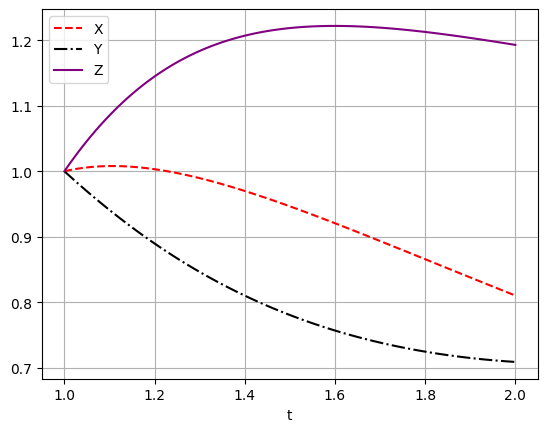

In [26]:
inp = np.ones(3)
runge_kuta(inp, 100, 0.01)

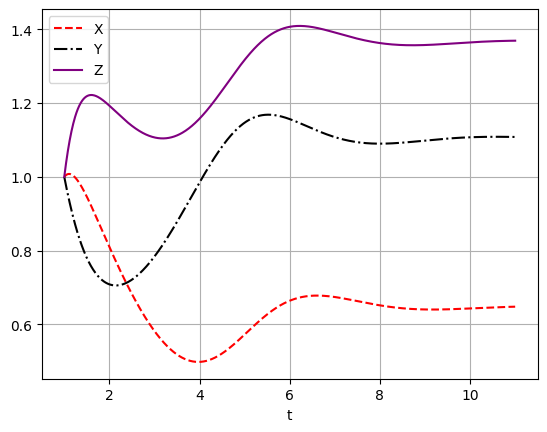

In [27]:
inp = np.ones(3)
runge_kuta(inp, 1000, 0.01)

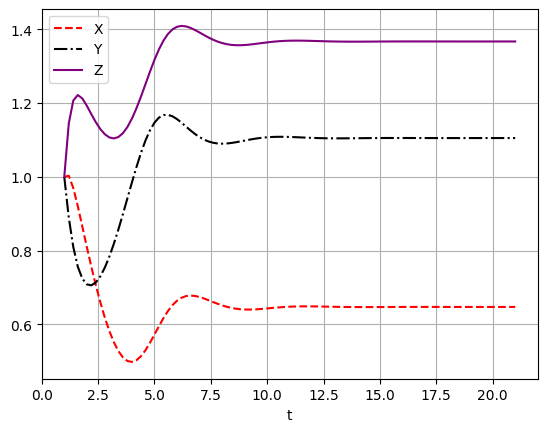

In [28]:
inp = np.ones(3)
runge_kuta(inp, 100, 0.2)

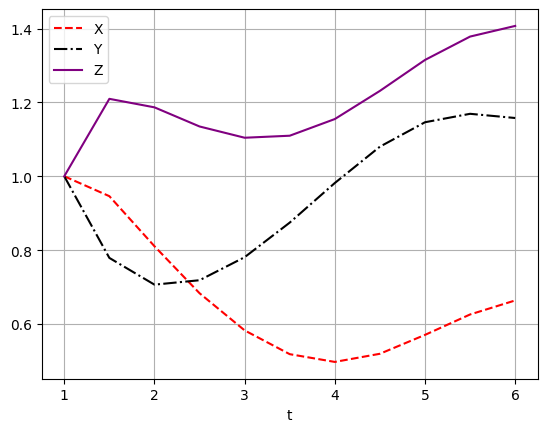

In [29]:
inp = np.ones(3)
runge_kuta(inp, 10, 0.5)

<font color=green size = 6>
Write anything that you interpreted in at most 5 line <br>
<font color=green size = 6>

Answer:
Using larger step sizes tends to result in increased oscillation and longer convergence times, which can even lead to divergence of the algorithm. In contrast, increasing the number of iterations promotes stability. Therefore, while smaller step sizes can enhance both accuracy and stability, they also require more computational resources.



Here is the newton raphson method for solving equations where J is jacobian matrix and F is the equation that we want to solve:
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \cdot F(\mathbf{x}_n)
$$

Use this method to solve this equation:
$$
x^2 + y^2 - 4 = 0
$$
$$
e^{x} + y - 1 = 0
$$


In [30]:
# def F(x):
#     return np.array([x[0]**2 + x[1]**2 - 4, np.exp(x[0]) + x[1] - 1])

# def jacobian(x):
#     #TODO
#     pass

# def newton_raphson(x0, max_iter=10):
#     #TODO
#     pass

def newton_raphson(x0,m=10):
    x,a=np.array(x0),[x0]
    for _ in range(m):a.append(x:=x-np.array([[1,-2*x[1]],[-np.exp(x[0]),2*x[0]]]/(2*x[0]-2*x[1]*np.exp(x[0])))@[x@x-4,np.exp(x[0])+x[1]-1])
    a=np.array(a).T
    plt.plot(a[0],'--',color='red',label='X')
    plt.plot(a[1],'-.',color='purple',label='Y')
    plt.xlabel('step');plt.ylabel('value');plt.legend();plt.grid()
    plt.show()
    return a[:,-1]


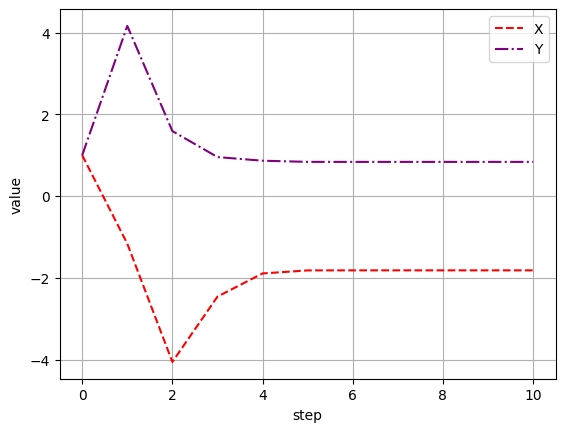

array([-1.81626407,  0.8373678 ])

In [31]:
#TODO
# init point [1,1], max_iter = 10
newton_raphson([1, 1], 10)

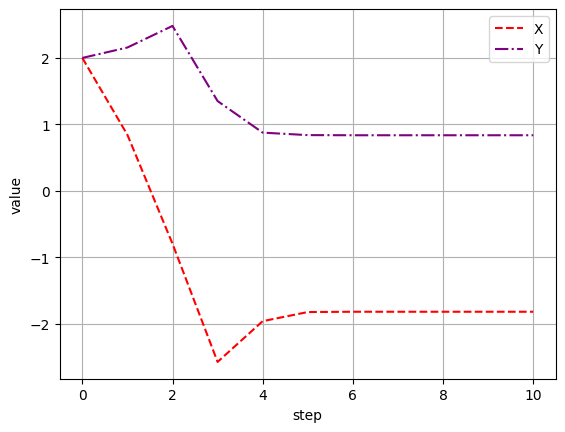

array([-1.81626407,  0.8373678 ])

In [32]:
#TODO
# init point [2,2], max_iter = 10
newton_raphson([2, 2], 10)

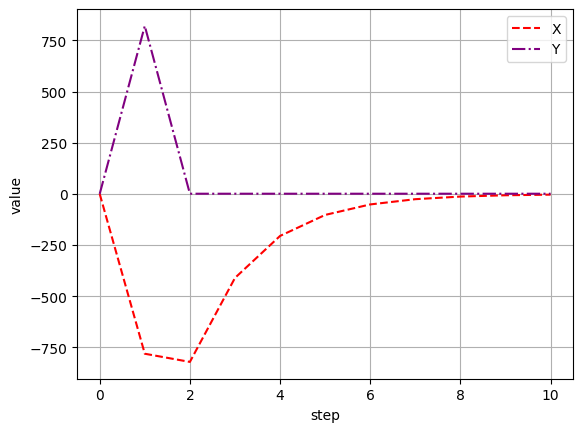

array([-3.51432102,  0.9943161 ])

In [33]:
#TODO
# init point [0.05,0.05], max_iter = 10
newton_raphson([0.05, 0.05], 10)

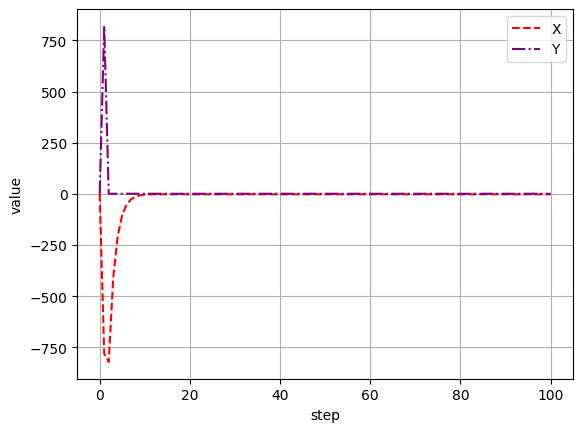

array([-1.81626407,  0.8373678 ])

In [34]:
#TODO
# init point [0.05,0.05], max_iter = 100
newton_raphson([0.05, 0.05], 100)

<font color=green size = 6>
Write anything that you interpreted in at most 5 line <br>
<font color=green size = 6>

Answer:
The Newton-Raphson method effectively converges toward a solution, with point trajectories steadily approaching equilibrium. Testing different initial points reveals varying convergence rates and paths, as shown in the plots. Points near the solution converge quickly, while distant ones may need more iterations or fail to converge. Increasing iterations improves accuracy, highlighting the method's sensitivity to initial values and function properties.

